In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder

In [25]:
# Load the dataset
df = pd.read_csv("International_debt dataset.csv")

# Data Cleaning
print(df.isnull().sum())

country_name      0
country_code      0
indicator_name    0
indicator_code    0
debt              0
dtype: int64


In [26]:
df

,country_name,country_code,indicator_name,indicator_code,debt
0,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,72894453.7
1,Afghanistan,AFG,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,53239440.1
2,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,61739336.9
3,Afghanistan,AFG,"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD,49114729.4
4,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,39903620.1
...,...,...,...,...,...
2352,Zimbabwe,ZWE,"PPG, official creditors (AMT, current US$)",DT.AMT.OFFT.CD,98492119.9
2353,Zimbabwe,ZWE,"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD,44396033.7
2354,Zimbabwe,ZWE,"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD,15761660.0
2355,Zimbabwe,ZWE,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,461632253.7


In [27]:
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['country_code'] = label_encoder.fit_transform(df['country_code'])
df['indicator_code'] = label_encoder.fit_transform(df['indicator_code'])

In [28]:
# Data Exploration
print(df.describe())
print("Unique Countries:", df['country_name'].nunique())
print("Unique Indicators:", df['indicator_name'].nunique())

       country_code  indicator_code          debt
count   2357.000000     2357.000000  2.357000e+03
mean      60.053034       11.508273  1.306633e+09
std       35.380171        7.312486  5.226771e+09
min        0.000000        0.000000  0.000000e+00
25%       30.000000        5.000000  1.548248e+07
50%       59.000000       11.000000  1.073140e+08
75%       90.000000       18.000000  5.716575e+08
max      123.000000       24.000000  9.621862e+10
Unique Countries: 124
Unique Indicators: 25


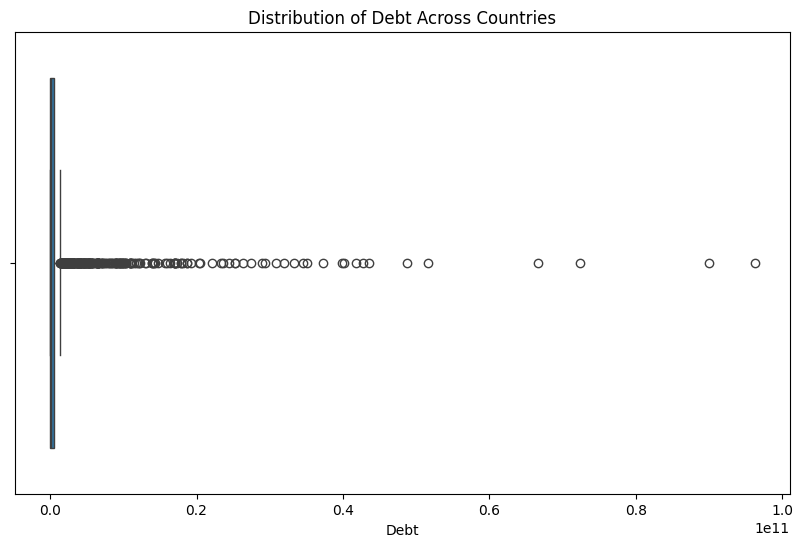

In [29]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='debt', data=df)
plt.title('Distribution of Debt Across Countries')
plt.xlabel('Debt')
plt.show()

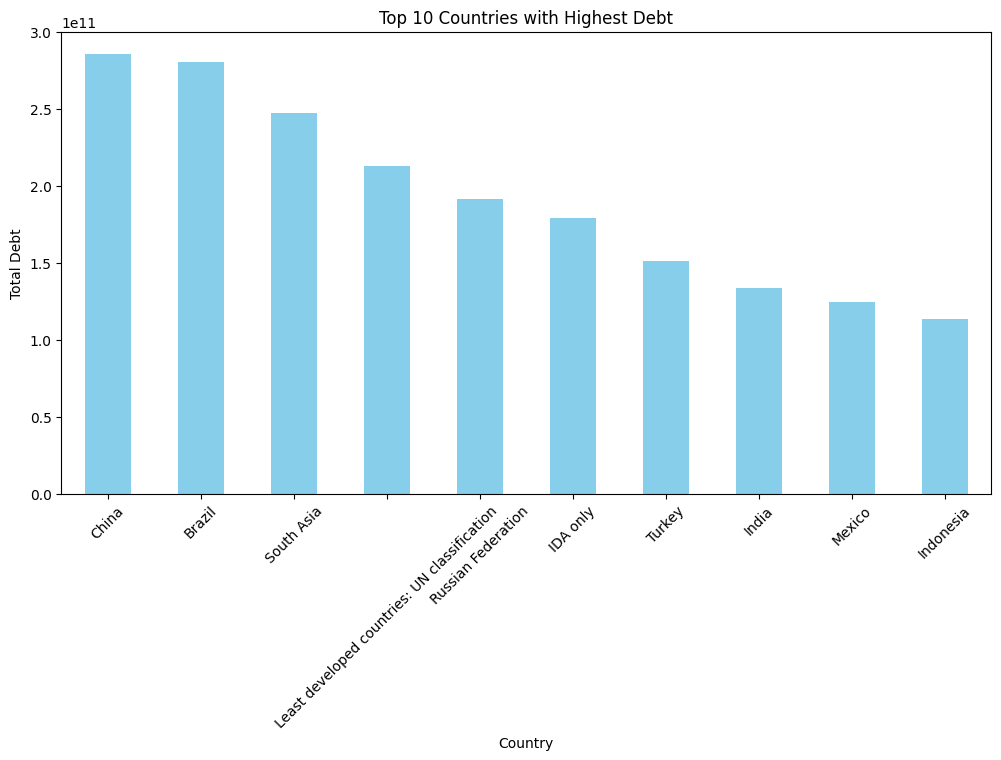

In [30]:
top_countries_debt = df.groupby('country_name')['debt'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries_debt.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Debt')
plt.xlabel('Country')
plt.ylabel('Total Debt')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Analysis
high_debt_countries = df.groupby('country_name')['debt'].sum().nlargest(5)
print("\nTop 5 Countries with Highest Total Debt:")
print(high_debt_countries)


Top 5 Countries with Highest Total Debt:
country_name
China                                           2.857935e+11
Brazil                                          2.806240e+11
South Asia                                      2.476087e+11
Least developed countries: UN classification    2.128810e+11
Russian Federation                              1.912891e+11
Name: debt, dtype: float64


In [32]:
low_debt_countries = df.groupby('country_name')['debt'].sum().nsmallest(5)
print("\nTop 5 Countries with Lowest Total Debt:")
print(low_debt_countries)


Top 5 Countries with Lowest Total Debt:
country_name
Sao Tome and Principe    44798032.5
Tonga                    55209304.8
Comoros                  57568483.2
Timor-Leste              71000959.2
Turkmenistan             95135629.3
Name: debt, dtype: float64


<ipython-input-33-85375670c0c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


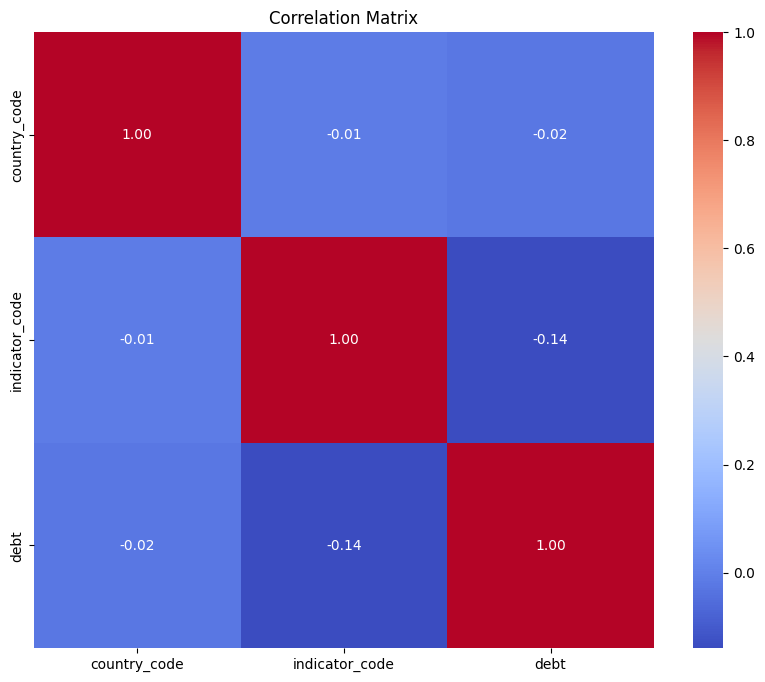

In [33]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

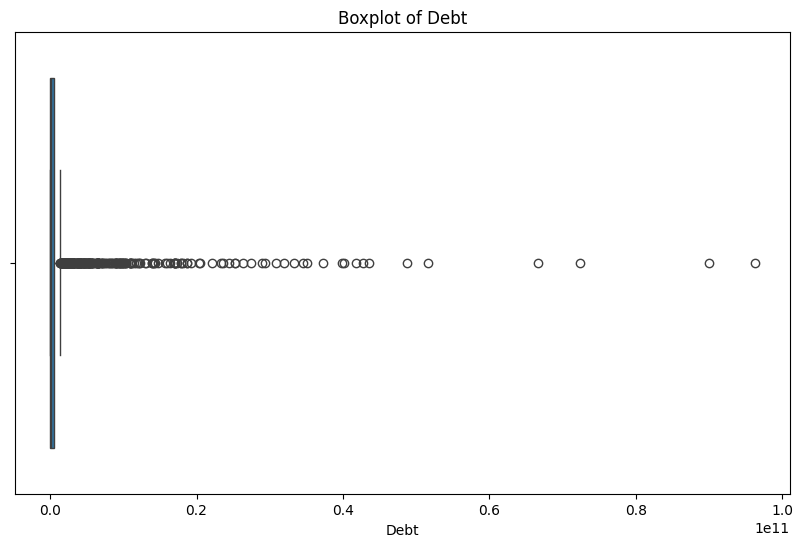

In [34]:
# Outlier Analysis and Handling
plt.figure(figsize=(10, 6))
sns.boxplot(x='debt', data=df)
plt.title('Boxplot of Debt')
plt.xlabel('Debt')
plt.show()

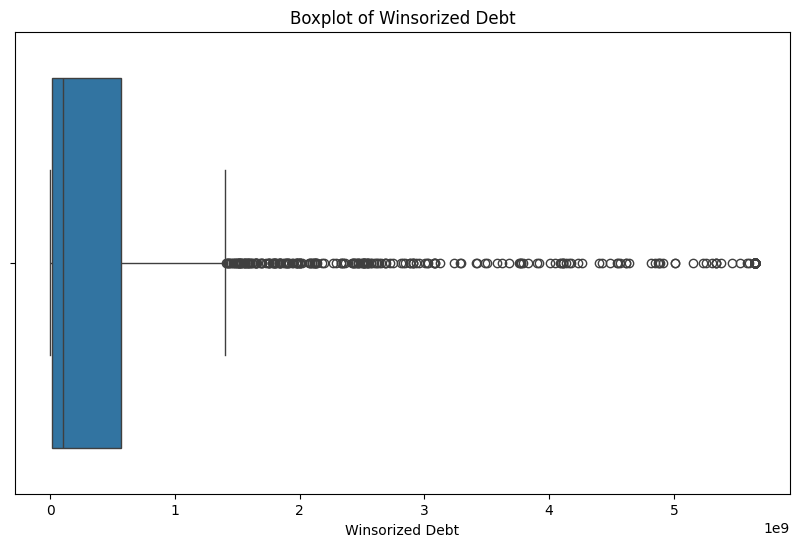

In [35]:
# Winsorization
df['debt_winsorized'] = winsorize(df['debt'], limits=[0.05, 0.05])

plt.figure(figsize=(10, 6))
sns.boxplot(x='debt_winsorized', data=df)
plt.title('Boxplot of Winsorized Debt')
plt.xlabel('Winsorized Debt')
plt.show()

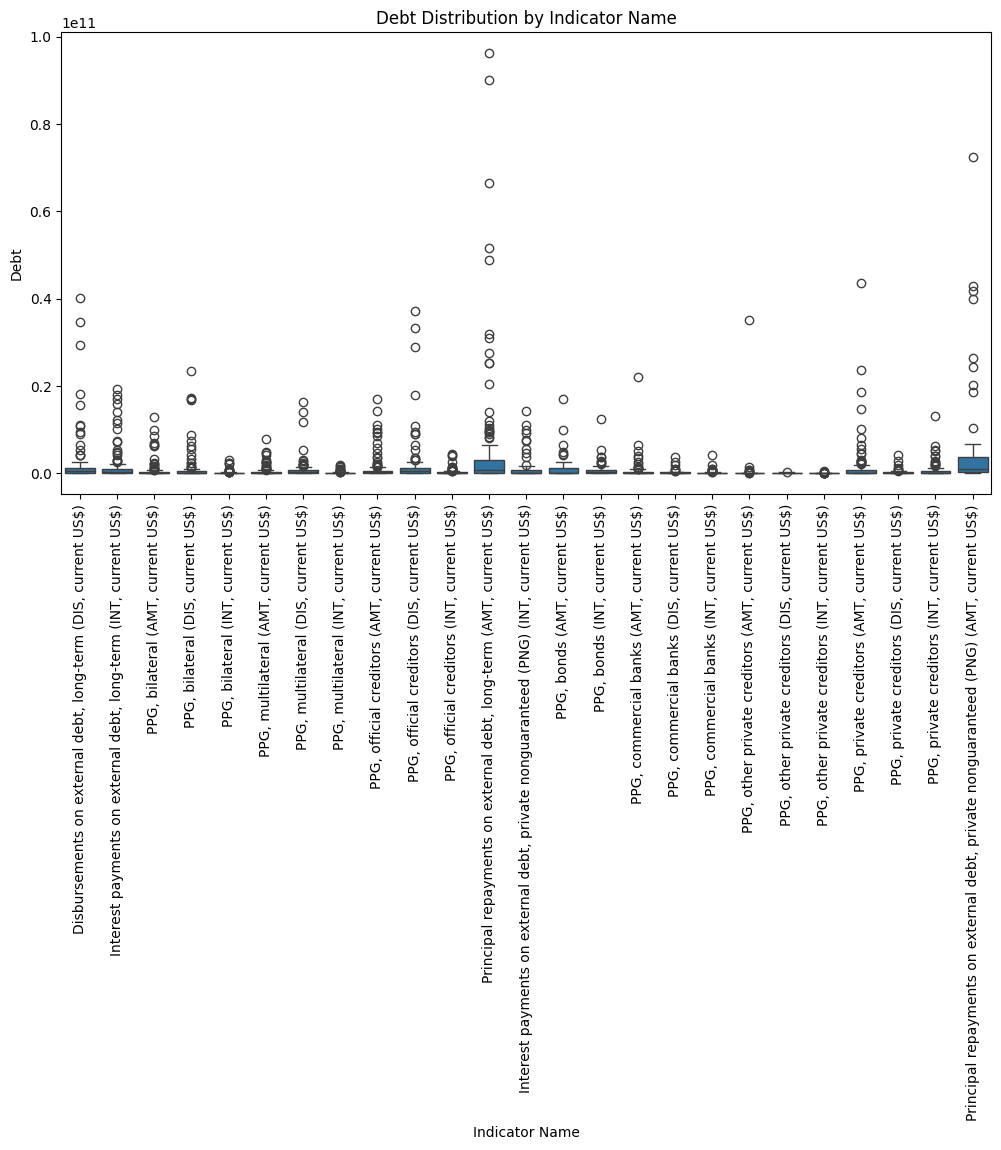

In [36]:
# Additional Visualizations and Analysis
# Debt Distribution by Indicator Name
plt.figure(figsize=(12, 6))
sns.boxplot(x='indicator_name', y='debt', data=df)
plt.title('Debt Distribution by Indicator Name')
plt.xlabel('Indicator Name')
plt.ylabel('Debt')
plt.xticks(rotation=90)
plt.show()

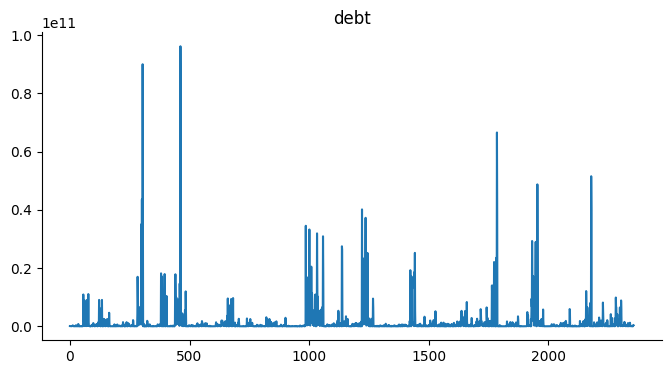

In [38]:
# debt

from matplotlib import pyplot as plt
df['debt'].plot(kind='line', figsize=(8, 4), title='debt')
plt.gca().spines[['top', 'right']].set_visible(False)

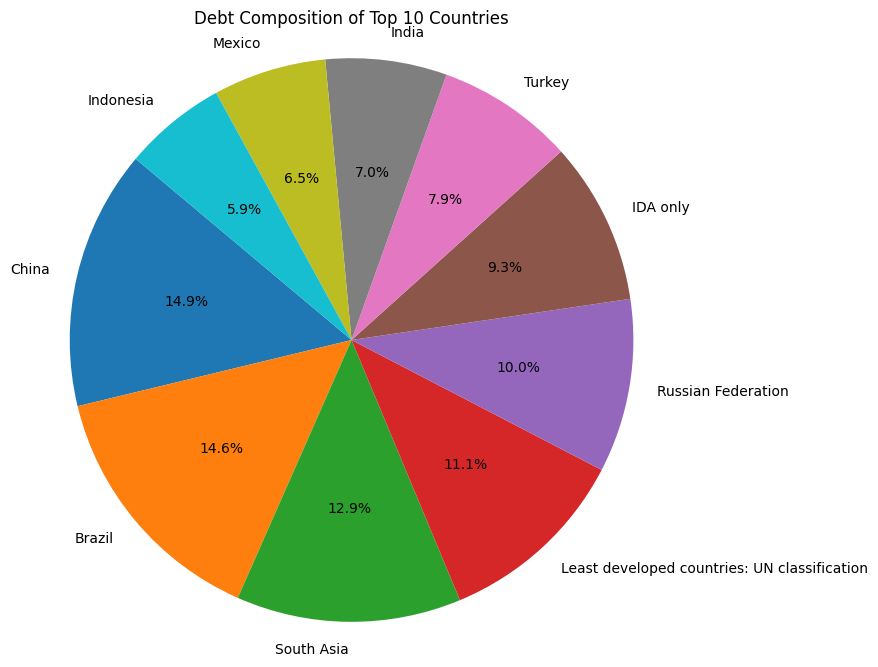

In [37]:
# Debt Composition Pie Chart
top_countries_debt = df.groupby('country_name')['debt'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_countries_debt, labels=top_countries_debt.index, autopct='%1.1f%%', startangle=140)
plt.title('Debt Composition of Top 10 Countries')
plt.axis('equal')
plt.show()

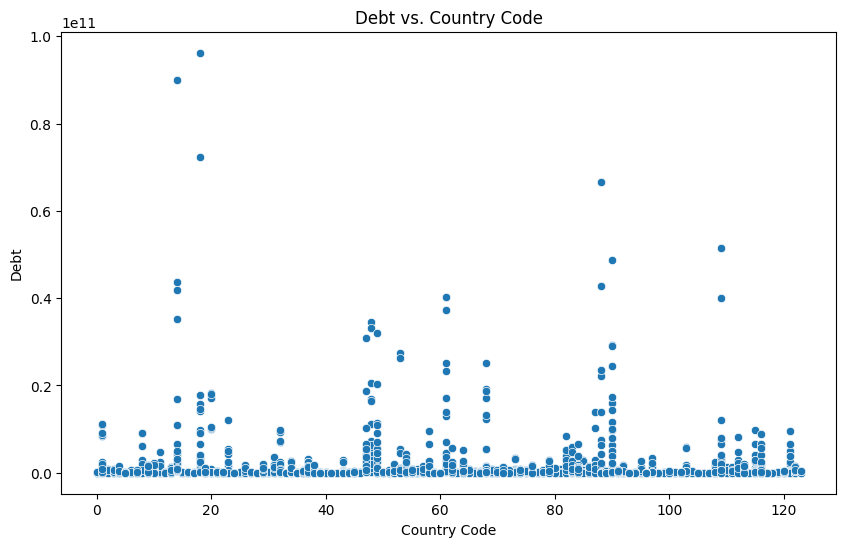

In [39]:
# Debt vs. Country Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country_code', y='debt', data=df)
plt.title('Debt vs. Country Code')
plt.xlabel('Country Code')
plt.ylabel('Debt')
plt.show()

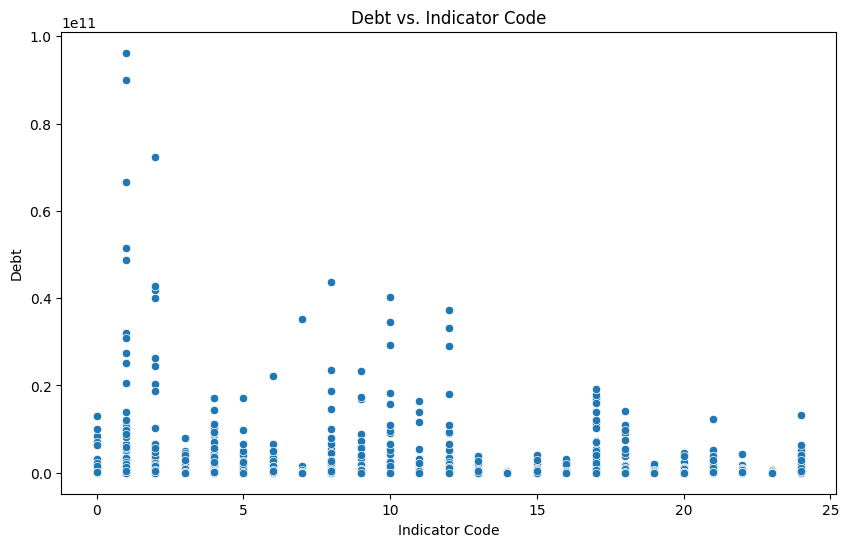

In [40]:

# Debt vs. Indicator Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='indicator_code', y='debt', data=df)
plt.title('Debt vs. Indicator Code')
plt.xlabel('Indicator Code')
plt.ylabel('Debt')
plt.show()

<ipython-input-41-a543b340bd77>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


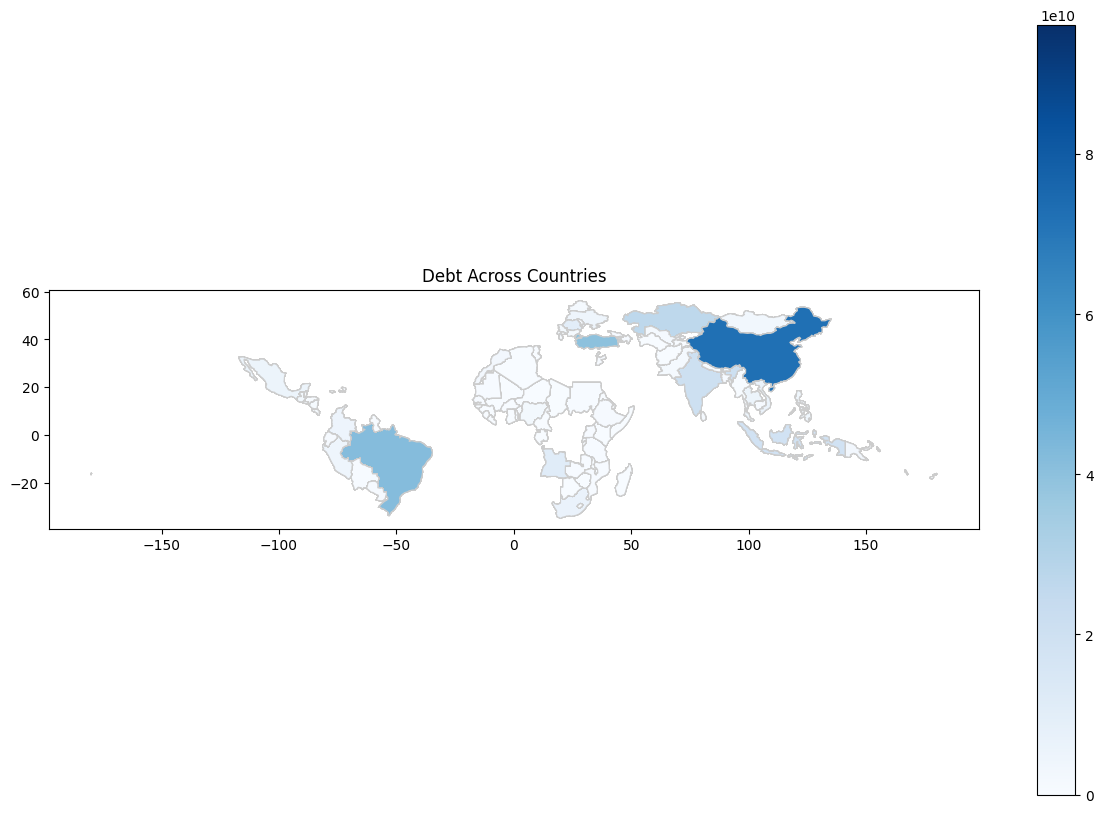

In [41]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'country_name'})

# Merge debt data with world map data
merged = world.merge(df, on='country_name')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='debt', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Debt Across Countries')
plt.show()

Mean Squared Error: 2.817805789149003e+19


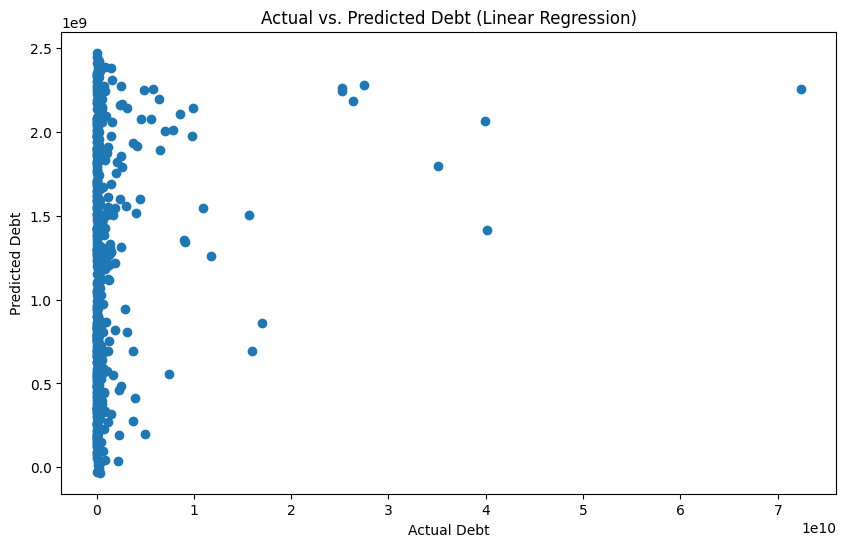

In [42]:
# Predictive Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
X = df[['country_code', 'indicator_code']]  # Features (Country Code and Indicator Code)
y = df['debt']   # Target variable (Debt)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Debt (Linear Regression)')
plt.xlabel('Actual Debt')
plt.ylabel('Predicted Debt')
plt.show()
